In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Metbolic Syndrome GA-ELM 

/content/drive/MyDrive/Metbolic Syndrome GA-ELM


In [ ]:
%ls

 MeatboilcSyndromeUsingGAELM.ipynb   __pycache__/
'Metabolic  Syndrome.csv'           'SDS-2 S22BS001.docx'
 Metabolic-syndrome-updated.csv


# Feature Engineering

In [ ]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
!python --version
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

1.3.5
1.21.6
Python 3.8.10
0.11.2


In [ ]:
df=pd.read_csv("Metabolic  Syndrome.csv")
df.head(20)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,No MetSyn
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,No MetSyn
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,No MetSyn
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,No MetSyn
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,No MetSyn


In [ ]:
df.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

#### Income  Feature

As we can see Income is a feature which falls in the catagoery of MCAR(Missing Completely At Random)  
so we will use mean imputation for this paritcular feature

In [ ]:
#Standard Deviation of before and after
print(df['Income'].std())
print(df['Income'].fillna(df.Income.mean()).std())

2954.0321859065984
2881.1280308757064


In [ ]:
meanIncome=df['Income'].fillna(df.Income.mean())
print(df['Income'])
print(df.Income.mean())
print(meanIncome)

0       8200.0
1       4500.0
2        800.0
3       2000.0
4          NaN
         ...  
2396    1000.0
2397    2000.0
2398     800.0
2399    8200.0
2400    6200.0
Name: Income, Length: 2401, dtype: float64
4005.2539404553413
0       8200.00000
1       4500.00000
2        800.00000
3       2000.00000
4       4005.25394
           ...    
2396    1000.00000
2397    2000.00000
2398     800.00000
2399    8200.00000
2400    6200.00000
Name: Income, Length: 2401, dtype: float64


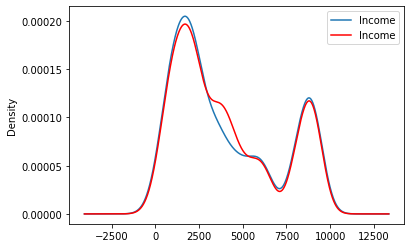

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Income'].plot(kind='kde', ax=ax)
meanIncome.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Sensing the outlier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


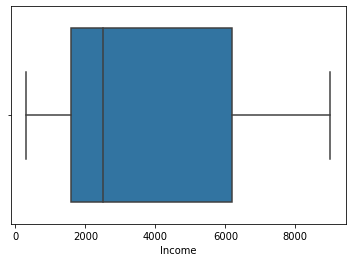

In [ ]:
sns.boxplot('Income',data=df);

In [ ]:
#so we are good to go as it is not changing the data distribution
df['Income']=df['Income'].fillna(df.Income.mean())

#### Marital Status Feature

As observing Marital Status Column we can easily see it is also an Missing Completely At Random feature because some people dont like to 
talk about the personal life information and by seeing the missing value count we know that Marital column is the column with 
highest missing values. so we do mode imputaion here

In [ ]:
df['Marital']=df['Marital'].fillna(df.Marital.mode()[0])

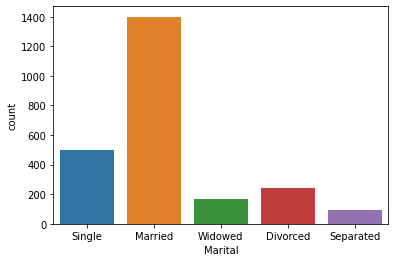

In [ ]:
sns.countplot(x="Marital",data=df)

#### NOTE :
As we can see Married is the most occuring value by 
reaplacing missing values with Married Doesn't Create 
so much change to data but we can also introduce a new
variable in Marital column called missing which i could 
have done if data is equaly distributed 

In [ ]:
df.isnull().sum()

seqn                  0
Age                   0
Sex                   0
Marital               0
Income                0
Race                  0
WaistCirc            85
BMI                  26
Albuminuria           0
UrAlbCr               0
UricAcid              0
BloodGlucose          0
HDL                   0
Triglycerides         0
MetabolicSyndrome     0
dtype: int64

#### BMI and WaistCir Nan Handling

First we wil delete all the rows which both have missing values because we dont want our feature to be bais to some particular value so it can cause baisness in our model

In [ ]:
df=df.dropna(subset=['WaistCirc','BMI'], how='all')

#### Note:
it will not cause any diffrence in data distribution

In [ ]:
df.isnull().sum()

seqn                  0
Age                   0
Sex                   0
Marital               0
Income                0
Race                  0
WaistCirc            64
BMI                   5
Albuminuria           0
UrAlbCr               0
UricAcid              0
BloodGlucose          0
HDL                   0
Triglycerides         0
MetabolicSyndrome     0
dtype: int64

After deleting the values that are missing in both values we are left with only 5 values which are missing in BMI column and 64
with WaistCirc Column.

In [ ]:
print(df['BMI'].std())
print(df['BMI'].fillna(df.BMI.mean()).std())
#For 5 missing BMI value we can simply do mean imputation as there aproximately no difference between the bot stds

6.662242204699269
6.655237427024052


In [ ]:
meanBMI=df['BMI'].fillna(df.BMI.mean())
print(meanBMI)

0       23.3
1       23.2
2       20.1
3       33.3
4       20.1
        ... 
2396    59.7
2397    18.0
2398    29.4
2399    31.3
2400    27.5
Name: BMI, Length: 2380, dtype: float64


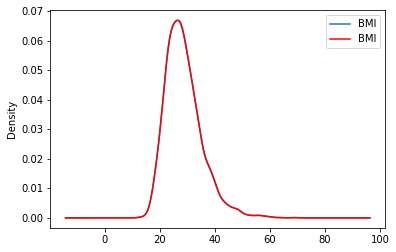

In [ ]:
meanIncome=df['BMI'].fillna(df.Income.mean())
fig = plt.figure()
ax = fig.add_subplot(111)
df['BMI'].plot(kind='kde', ax=ax)
meanBMI.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


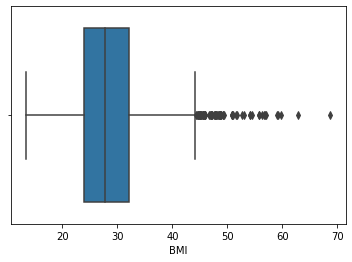

In [ ]:
sns.boxplot('BMI',data=df)

Data Distribution is almost the same
So we are Good to go

In [ ]:
df['BMI']=df['BMI'].fillna(df.BMI.mean())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


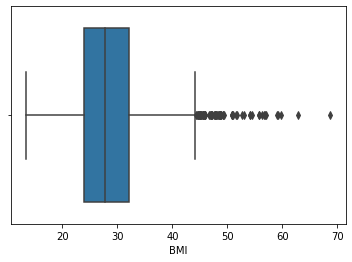

In [ ]:
sns.boxplot('BMI',data=df)

#### WaistCirc Feature 

As We can see from data trend WaistCirc is MNAR(Missing Not At Random)
so we dont want to manipulate data so we drop missing values 

In [ ]:
#df['WaistCirc'].fillna(df.WaistCirc.median(),inplace=True)
df=df.dropna(axis = 0, how ='any')

In [ ]:
df.isnull().sum()

seqn                 0
Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

In [ ]:
df.to_csv("Metabolic-syndrome-updated.csv",index=False)

#######################################################################################################

##### End of Feature Engineering
we are completed with our missing values by understanding 
data trends and feature importance and we have applied best 
technique for our features

#######################################################################################################

# Feature Selection


In [ ]:
df=pd.read_csv("Metabolic-syndrome-updated.csv")

In [ ]:
df.head(5)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.00000,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.00000,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.00000,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.00000,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,4005.25394,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [ ]:
df['MetabolicSyndrome']=np.where(df['MetabolicSyndrome']=="MetSyn",1,0)
df['Sex']=np.where(df['Sex']=="Male",1,0)
df.drop('seqn',axis=1,inplace=True)

In [ ]:
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,1,Single,8200.00000,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,0,Married,4500.00000,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,1,Single,800.00000,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,0,Single,2000.00000,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,1,Married,4005.25394,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


## Checking Feature importance of Categorical variable using Chi-squared test
#### 1) Marital 
#### 2) Race

In [ ]:
newDf=df[["Marital","Race"]]

In [ ]:
newDf.head()

,Marital,Race
0,Single,White
1,Married,White
2,Single,Asian
3,Single,Black
4,Married,Asian


In [ ]:
ordinal_label = {k: i for i, k in enumerate(newDf['Marital'].unique(), 0)}
newDf['Marital'] = newDf['Marital'].map(ordinal_label)

<ipython-input-34-d0b83682ebb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['Marital'] = newDf['Marital'].map(ordinal_label)


In [ ]:
{k: i for i, k in enumerate(newDf['Race'].unique(), 0)}

{'White': 0,
 'Asian': 1,
 'Black': 2,
 'MexAmerican': 3,
 'Hispanic': 4,
 'Other': 5}

In [ ]:
ordinal_label = {k: i for i, k in enumerate(newDf['Race'].unique(), 0)}
newDf['Race'] = newDf['Race'].map(ordinal_label)

<ipython-input-36-8a798fa4a224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['Race'] = newDf['Race'].map(ordinal_label)


In [ ]:
newDf.head()

,Marital,Race
0,0,0
1,1,0
2,0,1
3,0,2
4,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newDf[['Race','Marital']],
                                              df['MetabolicSyndrome'],test_size=0.3,random_state=100)

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [ ]:
f_p_values

(array([ 0.43875154, 22.16052215]), array([5.07725651e-01, 2.50777735e-06]))

In [ ]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

Race       0.507726
Marital    0.000003
dtype: float64

In [ ]:
p_values.sort_index(ascending=False)

Race       0.507726
Marital    0.000003
dtype: float64

droping Marital feature according to the results

In [ ]:
df.drop("Marital",axis=1,inplace=True)

## Checking Feature significance of numerical features using mutual information feature selection
 
#### 1) BloodGlucose     
#### 2) Triglycerides    
#### 3) WaistCirc        
#### 4) BMI              
#### 5) HDL              
#### 6) Age              
#### 7) UricAcid         
#### 8) Albuminuria      
#### 9) Sex              
#### 10) UrAlbCr          
#### 11) Income 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop(["Race","MetabolicSyndrome"],axis=1),df["MetabolicSyndrome"],test_size=0.2,random_state=97)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01755169, 0.00031452, 0.        , 0.14789735, 0.09227034,
       0.01014707, 0.00370443, 0.01966084, 0.16687011, 0.09598232,
       0.16226768])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

BloodGlucose     0.166870
Triglycerides    0.162268
WaistCirc        0.147897
HDL              0.095982
BMI              0.092270
UricAcid         0.019661
Age              0.017552
Albuminuria      0.010147
UrAlbCr          0.003704
Sex              0.000315
Income           0.000000
dtype: float64

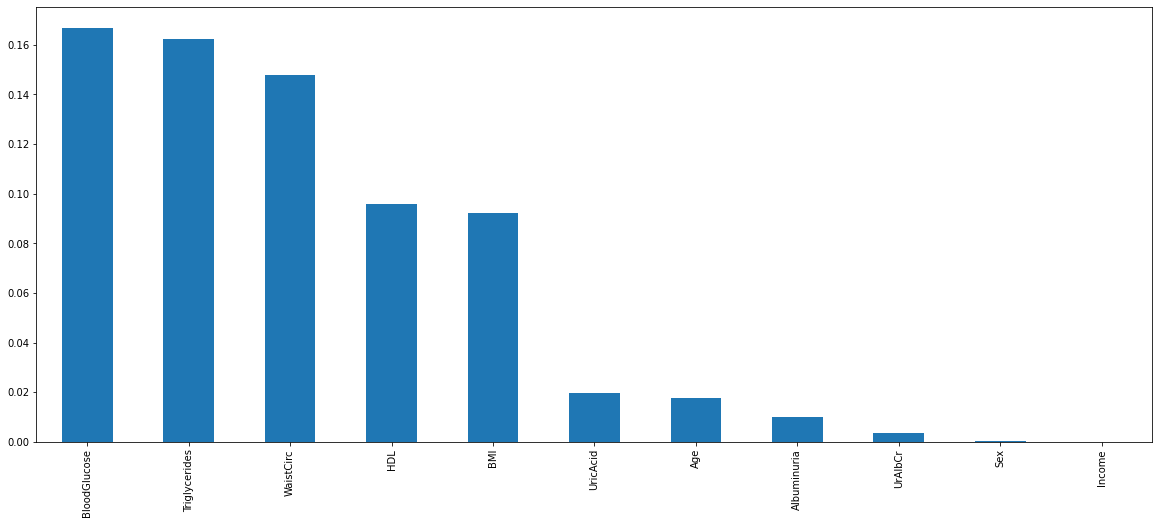

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
df.drop("Sex",axis=1,inplace=True)
df.drop("UricAcid",axis=1,inplace=True)
df.drop("Income",axis=1,inplace=True)
df.drop("UrAlbCr",axis=1,inplace=True)
df.drop("Albuminuria",axis=1,inplace=True)
df.drop("Age",axis=1,inplace=True)


In [ ]:
df.head(10)

,Race,WaistCirc,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,White,81.0,23.3,92,41,84,0
1,White,80.1,23.2,82,28,56,0
2,Asian,69.6,20.1,107,43,78,0
3,Black,120.4,33.3,104,73,141,0
4,Asian,81.1,20.1,95,43,126,0
5,White,112.5,28.5,105,47,100,0
6,Black,78.6,22.1,87,61,40,0
7,Asian,80.2,22.4,83,48,91,0
8,Black,99.0,28.2,94,46,86,0
9,White,107.8,28.0,100,35,98,1


# GA ELM

In [ ]:
ordinal_label = {k: i for i, k in enumerate(df['Race'].unique(), 0)}
df['Race'] = df['Race'].map(ordinal_label)

In [ ]:
df.head()

,Race,WaistCirc,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,0,81.0,23.3,92,41,84,0
1,0,80.1,23.2,82,28,56,0
2,1,69.6,20.1,107,43,78,0
3,2,120.4,33.3,104,73,141,0
4,1,81.1,20.1,95,43,126,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop("MetabolicSyndrome",axis=1),df["MetabolicSyndrome"],test_size=0.2,random_state=97)

In [ ]:
X_train.head()

,Race,WaistCirc,BMI,BloodGlucose,HDL,Triglycerides
2194,3,77.5,22.2,89,52,86
156,3,100.8,31.4,123,59,111
2172,1,77.1,20.6,81,59,106
2155,1,78.0,22.2,94,71,44
443,2,124.6,42.0,100,51,88


In [ ]:
def initilialize_poplulation(numberOfParents):
    hidden_neurons = np.empty([numberOfParents, 1], dtype = np.uint8)
    loss_function = np.empty([numberOfParents, 1],)
    activation_function = np.empty([numberOfParents, 1])
    
    for i in range(numberOfParents):
        #print(i)
        hidden_neurons[i] = int(random.randrange(1, 5000))
        loss_function[i] = int(random.randrange(0, 4))
        activation_function[i] = int(random.randrange(0, 8))
      
    
    population = np.concatenate((hidden_neurons, loss_function, activation_function), axis= 1)
    return population

In [ ]:
!pip install pyoselm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyoselm.oselm import OSELMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
def fitness_accscore(y_true, y_pred):
    fitness = round(accuracy_score(y_true, y_pred),6)
    return fitness
def fitness_predscore(y_true, y_pred):
    fitness = round(precision_score(y_true, y_pred),6)
    return fitness


#train the data annd find fitness score
def train_population(population, train,y_train, test, y_test):
    fScore = []
    modelElm=[]
    #hardlim
    #loss_list=['mean_squared_error','mean_absolute_error','categorical_crossentropy','binary_crossentropy']
    activation_list=['multiquadric','sine','tribas','hardlim','softlim','gaussian','tanh','inv_multiquadric']
    for i in range(population.shape[0]):
        param_dist = {

                'n_hidden': int(population[i][0]),
                'activation_func':activation_list[int(population[i][2])],
            } 
              
        model = OSELMClassifier(**param_dist)
        ### Batch Training
        
        # batches_x = [train[:model.n_hidden]] + [[x_i] for x_i in train[model.n_hidden:]]
        # batches_y = [y_train[:model.n_hidden]] + [[y_i] for y_i in y_train[model.n_hidden:]]
        # for b_x, b_y in zip(batches_x, batches_y):
        #   model.fit(b_x, b_y)

        #### Simple Training
        model.fit(train,y_train)
        
        
        preds = model.predict(test)
        # print(" Start ")
        print(fitness_accscore(y_test, preds))
        # print(activation_list[int(population[i][2])])
        # print(int(population[i][0]))
        # print(" End ")
        fScore.append(fitness_accscore(y_test, preds))
        modelElm.append(model)
    return fScore,modelElm

In [ ]:
def new_parents_selection(population, fitness, numParents):
    selectedParents = np.empty((numParents, population.shape[1])) #create an array to store fittest parents
    
    #find the top best performing parents
    for parentId in range(numParents):
        bestFitnessId = np.where(fitness == np.max(fitness))
        bestFitnessId  = bestFitnessId[0][0]
        selectedParents[parentId, :] = population[bestFitnessId, :]
        fitness[bestFitnessId] = -1 #set this value to negative, in case of F1-score, so this parent is not selected again
    return selectedParents

In [ ]:
'''
Mate these parents to create children having parameters from these parents (we are using uniform crossover method)
'''
def crossover_uniform(parents, childrenSize):
    crossoverPointIndex = np.arange(0, np.uint8(childrenSize[1]), 1, dtype= np.uint8) #get all the index
    crossoverPointIndex1 = np.random.randint(0, np.uint8(childrenSize[1]), np.uint8(childrenSize[1]/2)) # select half  of the indexes randomly
    crossoverPointIndex2 = np.array(list(set(crossoverPointIndex) - set(crossoverPointIndex1))) #select leftover indexes
    
    children = np.empty(childrenSize)
    
    '''
    Create child by choosing parameters from two parents selected using new_parent_selection function. The parameter values
    will be picked from the indexes, which were randomly selected above. 
    '''
    for i in range(childrenSize[0]):
        
        #find parent 1 index 
        parent1_index = i%parents.shape[0]
        #find parent 2 index
        parent2_index = (i+1)%parents.shape[0]
        #insert parameters based on random selected indexes in parent 1
        children[i, crossoverPointIndex1] = parents[parent1_index, crossoverPointIndex1]
        #insert parameters based on random selected indexes in parent 1
        children[i, crossoverPointIndex2] = parents[parent2_index, crossoverPointIndex2]
    return children

In [ ]:
def mutation(crossover, numberOfParameters):
    #Define minimum and maximum values allowed for each parameter
    minMaxValue = np.zeros((numberOfParameters, 2))

    minMaxValue[0:] = [1, 5000] #hidden neurons
    minMaxValue[1, :] = [0, 3] #loss funciton
    minMaxValue[2, :] = [0, 8] #activation function

 
    # Mutation changes a single gene in each offspring randomly.
    mutationValue = 0
    parameterSelect = np.random.randint(0, numberOfParameters, 1)
    if parameterSelect == 0: #hidden neuri
        mutationValue = 0
    if parameterSelect == 1: #loss function
         mutationValue = 0
    if parameterSelect == 2: #activation function
         mutationValue = 0

  
    #indtroduce mutation by changing one parameter, and set to max or min if it goes out of range
    for idx in range(crossover.shape[0]):
        crossover[idx, parameterSelect] = crossover[idx, parameterSelect] + mutationValue
        if(crossover[idx, parameterSelect] > minMaxValue[parameterSelect, 1]):
            crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 1]
        if(crossover[idx, parameterSelect] < minMaxValue[parameterSelect, 0]):
            crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 0]    
    return crossover

In [ ]:
import numpy as np
np.random.seed(11)

In [ ]:
import timeit
import random
modelElm=[]
bestModel=[]
bestFitness=[]
start = timeit.default_timer()
numberOfParents = 10 #number of parents to start
numberOfParentsMating = 2 #number of parents that will mate
numberOfParameters = 3 #number of parameters that will be optimized 
numberOfGenerations = 5 #number of genration that will be created
#define the population size
populationSize = (numberOfParents, numberOfParameters)
#initialize the population with randomly generated parameters
population = initilialize_poplulation(numberOfParents)
#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])
#define an array to store the value of each parameter for each parent and generation

populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])
#insert the value of initial parameters in history
populationHistory[0:numberOfParents, :] = population
for generation in range(numberOfGenerations):
    print("This is number %s generation" % (generation))
    
    #train the dataset and obtain fitness
    fitnessValue,modelElm = train_population(population=population, train=X_train,y_train=y_train, test=X_test, y_test=y_test)
    #print(np.argmax(fitnessValue))
    bestFitness.append(fitnessValue[np.argmax(fitnessValue)]) 
    bestModel.append(modelElm[np.argmax(fitnessValue)])
    
    fitnessHistory[generation, :] = fitnessValue
    #best score in the current iteration
    print('Best accuracy score in the this iteration = {}'.format(np.max(fitnessHistory[generation, :])*100))
    #survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = crossover_uniform(parents=parents, childrenSize=(populationSize[0] - parents.shape[0], numberOfParameters))
    
    #add mutation to create genetic diversity
    children_mutated = mutation(children, numberOfParameters)
    
    '''
    We will create new population, which will contain parents that where selected previously based on the
    fitness score and rest of them  will be children
    '''
    
    
    population[0:parents.shape[0], :] = parents #fittest parents
    population[parents.shape[0]:, :] = children_mutated #children
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information


stop = timeit.default_timer()
print('Execution time: ', (stop - start)/60)  

This is number 0 generation
0.842672
0.851293
0.853448
0.728448
0.648707
0.797414
0.674569
0.650862
0.508621
0.642241
Best accuracy score in the this iteration = 85.34479999999999
This is number 1 generation
0.853448
0.851293
0.851293
0.853448
0.851293
0.853448
0.851293
0.853448
0.851293
0.853448
Best accuracy score in the this iteration = 85.34479999999999
This is number 2 generation
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
Best accuracy score in the this iteration = 85.34479999999999
This is number 3 generation
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
Best accuracy score in the this iteration = 85.34479999999999
This is number 4 generation
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
0.853448
Best accuracy score in the this iteration = 85.34479999999999
Execution time:  0.02866255835000023


In [ ]:
print(bestFitness[np.argmax(bestFitness)]*100)

85.34479999999999


In [ ]:
bestModelIndex=np.argmax(bestFitness)
bestModelGAELM=bestModel[bestModelIndex]

In [ ]:
preds=bestModelGAELM.predict(X_test)

In [ ]:
newDf=pd.DataFrame()
newDf["Predictions"]=pd.Series(preds)
newDf["Real_Values"]=list(y_test)


In [ ]:
newDf.head(30)

,Predictions,Real_Values
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


## Custom Predictions

In [ ]:
# {'White': 0,
#  'Asian': 1,
#  'Black': 2,
#  'MexAmerican': 3,
#  'Hispanic': 4,
#  'Other': 5}
Race=2
WaistCirc=130.3
BMI=41
BloodGlucose=108
HDL=29
Triglycerides=194
predArr=[[Race,WaistCirc,BMI,HDL,Triglycerides]]

In [ ]:
postDf=pd.DataFrame(predArr,columns=["Race","WaistCirc","BMI","HDL","Triglycerides"])

In [ ]:
if int(bestModelGAELM.predict(postDf)) == 0:
    print('No MetSyn')
else:
    print('MetSyn')

MetSyn
